## Sales Order Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hotstepper import Steps

import warnings
warnings.filterwarnings("ignore")

Read the data file into a dataframe so we can filter some of the columns out and parse the key dates.

In [2]:

df_orders = pd.read_excel(r'..//..//data//superstore.xls',parse_dates=['Order Date', 'Ship Date'])
df_orders = df_orders[['Order Date', 'Ship Date','Sales','Quantity','Profit']]
df_orders.head()

,Order Date,Ship Date,Sales,Quantity,Profit
0,2016-11-08,2016-11-11,261.9600,2,41.9136
1,2016-11-08,2016-11-11,731.9400,3,219.5820
2,2016-06-12,2016-06-16,14.6200,2,6.8714
3,2015-10-11,2015-10-18,957.5775,5,-383.0310
4,2015-10-11,2015-10-18,22.3680,2,2.5164


We can quick visualise the data and apply a smoothing curve to get a feel for the shape and typical nature of the number of open sales orders.

<AxesSubplot:title={'center':'Open Orders'}, xlabel='Date', ylabel='Order Count'>

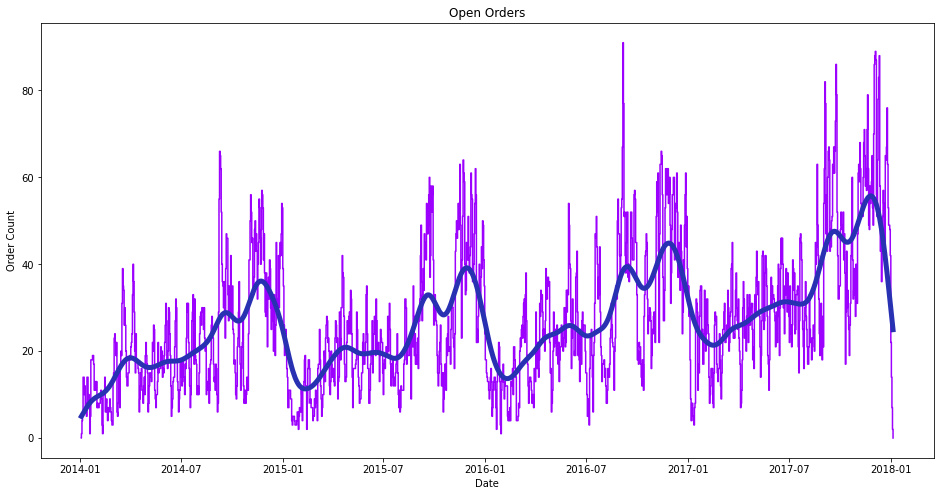

In [3]:
orders_steps = Steps(True).read_dataframe(df_orders,'Order Date','Ship Date')
ax = orders_steps.plot()
ax.set_title('Open Orders')
ax.set_xlabel('Date')
ax.set_ylabel('Order Count')
orders_steps.smooth_plot(ax=ax,linewidth=5)

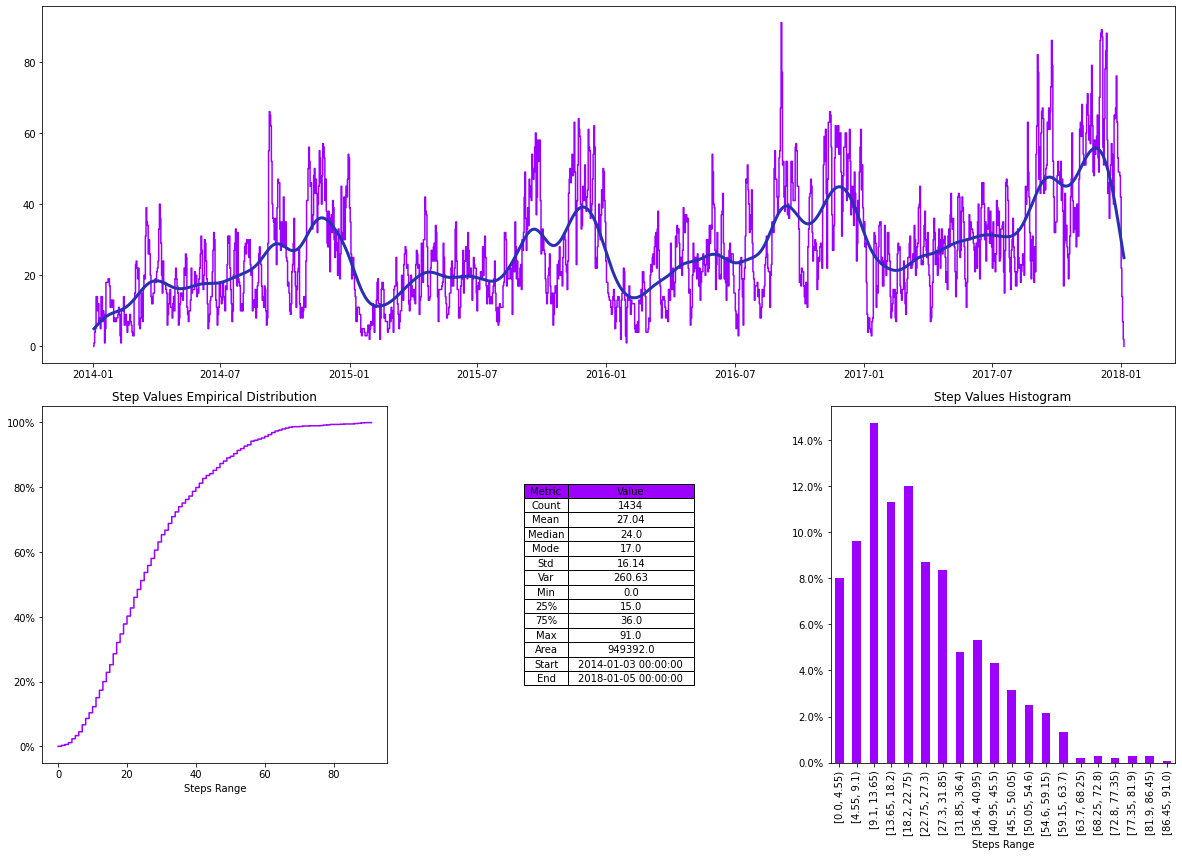

In [4]:
orders_steps.summary();

Based on the histogram, ~7% of the time we have 16-17 open orders.

<AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>

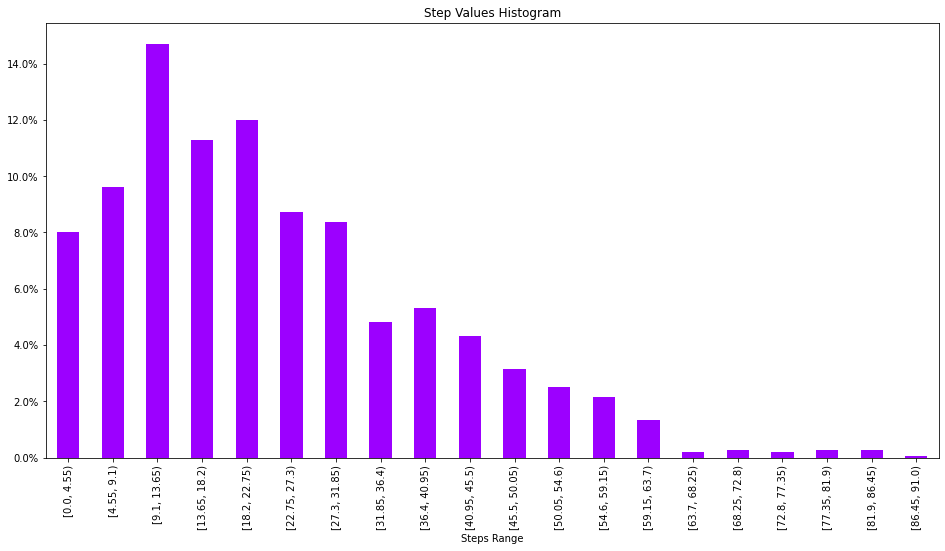

In [5]:
orders_steps.histogram_plot()

We can also generate an Empirical Cummulative Distribution to see how the values count change across the range.

<AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>

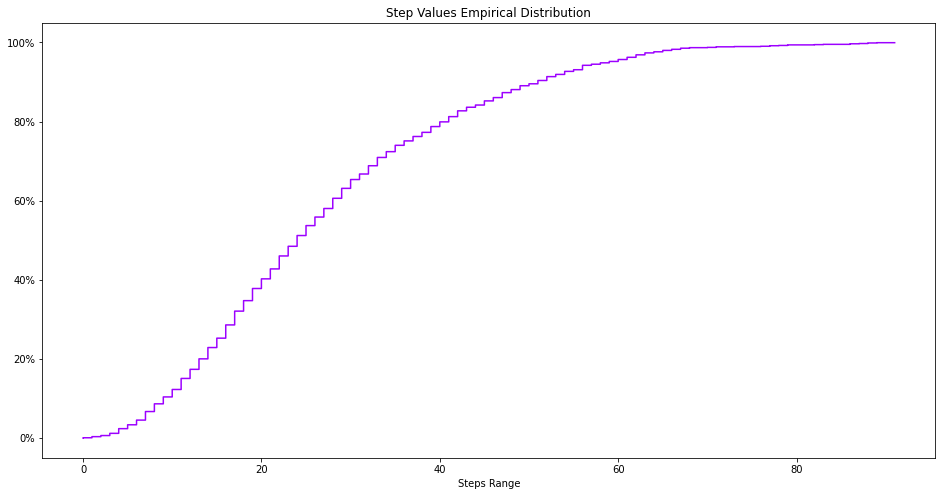

In [6]:
orders_steps.ecdf_plot()

We can quickly answer questions like, what percentage of the time are there more than 40 unshipped orders. We can filter for the times where there are more than 40 open orders, integrate this and divide by the interal of the total dataset.

In [9]:
((orders_steps> 40).integrate())/(orders_steps.integrate())

0.3865968956974568

We can also generate a quick overview of the key statistics of the dataset using the describe method.

In [8]:
orders_steps.describe()

,Metric,Value
0,Count,1434
1,Mean,27.04
2,Median,24.0
3,Mode,17.0
4,Std,16.14
5,Var,260.63
6,Min,0.0
7,25%,15.0
8,75%,36.0
9,Max,91.0
